# Simulating a Real-World Phenomenon - Irish Discrimination Rates

Explain

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
# 2014 Ratio: https://www.cso.ie/en/releasesandpublications/er/q-eq/qnhsequalitymodulequarter32014/

total_disc_yes = 0.12

# Of 12% Yes
M = 630
F = 1069
T = M + F

# Estimate Total Survey Size
total_survey = int(round(T / 0.12))
print("Estimated Total Survey Size: ", total_survey)


M_Y = (M/total_survey)
F_Y = (F/total_survey)

M_R = (M/total_survey)*100
F_R = (F/total_survey)*100

print("Percentage of Males who felt discriminated against: ", M_R)
print("Percentage of Females who felt discriminated against: ",F_R)

Estimated Total Survey Size:  14158
Percentage of Males who felt discriminated against:  4.449781042520129
Percentage of Females who felt discriminated against:  7.550501483260348


## Sex

In [3]:
# Set Array
sex_x = ['Male', 'Female']


# Build Dataframe - Assume 50% Males and Females
sex = np.random.choice(sex_x, total_survey, p=[0.5, 0.5])

df=pd.DataFrame(data={'Sex': sex})


print(df.head(10))

      Sex
0  Female
1    Male
2    Male
3    Male
4  Female
5  Female
6  Female
7  Female
8    Male
9  Female


## Experienced Discrimination

In [4]:
# Set Array
disc_x = ['M_Y', 'F_Y', 'M_N', 'F_N']

# Assume 50% Males and 50% Females
M_N = 0.5 - M_Y
F_N = 0.5 - F_Y


# Build Dataframe
disc = np.random.choice(disc_x, total_survey, p=[M_Y, F_Y, M_N, F_N])
df['Discriminated Against'] = disc

df ['Discriminated Against'].replace({'M_Y':'Yes', 'M_N':'No', 'F_Y':'Yes', 'F_N':'No'}, inplace=True)


print(df.head(10))

      Sex Discriminated Against
0  Female                    No
1    Male                    No
2    Male                    No
3    Male                    No
4  Female                    No
5  Female                    No
6  Female                    No
7  Female                    No
8    Male                   Yes
9  Female                   Yes


## Discrimination Type

In [8]:
# Set Array
discrim_type = ['Gender', 'Marital Status', 'Family Status', 'Age', 'Disability', 'Race', 'Other']

# Males

# Set Discrimination Types %
gen_m = 9
mar_m = 3
fam_m = 9
age_m = 24
dis_m = 6
rac_m = 21
oth_m = 41

# As Multiple Responses were allowed in the Survey, add weighting to correct %
tot_disc_m = gen_m + mar_m + fam_m + age_m + dis_m +  rac_m + oth_m

gen_m = gen_m/tot_disc_m
mar_m = mar_m/tot_disc_m
fam_m = fam_m/tot_disc_m
age_m = age_m/tot_disc_m
dis_m = dis_m/tot_disc_m
rac_m = rac_m/tot_disc_m
oth_m = oth_m/tot_disc_m

# Females

# Set Discrimination Types %
gen_f = 14 
mar_f = 5
fam_f = 14
age_f = 24
dis_f = 6
rac_f = 17
oth_f = 36

# As Multiple Responses were allowed in the Survey, add weighting to correct %
tot_disc_f = gen_f + mar_f + fam_f + age_f + dis_f +  rac_f + oth_f

gen_f = gen_f/tot_disc_f
mar_f = mar_f/tot_disc_f
fam_f = fam_f/tot_disc_f
age_f = age_f/tot_disc_f
dis_f = dis_f/tot_disc_f
rac_f = rac_f/tot_disc_f
oth_f = oth_f/tot_disc_f

# Split Dataframe
disc_yes =  df['Discriminated Against']=='Yes'
df_yes = df[disc_yes]

# Male
disc_yes_m =  df_yes['Sex']=='Male'
df_yes_m = df_yes[disc_yes_m]

# Female
disc_yes_f =  df_yes['Sex']=='Female'
df_yes_f = df_yes[disc_yes_f]


disc_no =  df['Discriminated Against']=='No'
df_no = df[disc_no]

# Set Count for Yes

# Male
yes_count_xm = df_yes_m['Discriminated Against']
yes_count_m = yes_count_xm.count()

# Female
yes_count_xf = df_yes_f['Discriminated Against']
yes_count_f = yes_count_xf.count()

# Populate Weighted Random Choice

# Male
type_disc_m = np.random.choice(discrim_type, yes_count_m, p=[gen_m, mar_m, fam_m, age_m, dis_m, rac_m, oth_m])

# Female
type_disc_f = np.random.choice(discrim_type, yes_count_f, p=[gen_f, mar_f, fam_f, age_f, dis_f, rac_f, oth_f])

# Set Type Column
df_no['Type'] = 'NA'
df_yes_m['Type'] = type_disc_m
df_yes_f['Type'] = type_disc_f


# Join Dataframes
frames_a = [df_yes_m, df_yes_f]

df_a = pd.concat(frames_a)

frames_b = [df_no, df_a]

df = pd.concat(frames_b)

# Sort by index
df.sort_index(inplace=True)
print(df)

          Sex Discriminated Against           Type
0      Female                    No             NA
1        Male                    No             NA
2        Male                    No             NA
3        Male                    No             NA
4      Female                    No             NA
5      Female                    No             NA
6      Female                    No             NA
7      Female                    No             NA
8        Male                   Yes          Other
9      Female                   Yes  Family Status
10       Male                    No             NA
11     Female                    No             NA
12     Female                    No             NA
13       Male                    No             NA
14     Female                   Yes           Race
15     Female                    No             NA
16     Female                    No             NA
17     Female                    No             NA
18       Male                  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

## Social Setting

In [6]:
# Set Array
discrim_set = ['Workplace', 'Looking for Work', 'Public Place', 'Education', 'Obtaining Housing', 'Accessing health services', 'Using transport services', 'Accessing public services']

# Set Discrimination Types %
gen_x = 9
mar_x = 3
fam_x = 9
age_x = 24
dis_x = 6
rac_x = 21
oth_x = 41

# As Multiple Responses were allowed in the Survey, add weighting to correct %
tot_disc = gen_x + mar_x + fam_x + age_x + dis_x +  rac_x + oth_x

gen_x = gen_x/tot_disc
mar_x = mar_x/tot_disc
fam_x = fam_x/tot_disc
age_x = age_x/tot_disc
dis_x = dis_x/tot_disc
rac_x = rac_x/tot_disc
oth_x = oth_x/tot_disc

# Split Dataframe
disc_yes =  df['Discriminated Against']=='Yes'
df_yes = df[disc_yes]

disc_no =  df['Discriminated Against']=='No'
df_no = df[disc_no]

# Set Count for Yes
yes_count_x = df_yes['Discriminated Against']
yes_count = yes_count_x.count()

# Populate Weighted Random Choice
type_disc = np.random.choice(discrim_type, yes_count, p=[gen_x, mar_x, fam_x, age_x, dis_x, rac_x, oth_x])

# Set Type Column
df_no['Type'] = 'NA'
df_yes['Type'] = type_disc


# Join Dataframes
frames = [df_no, df_yes]

df = pd.concat(frames)

# Sort by index
df.sort_index(inplace=True)
print(df.head(10))

      Sex Discriminated Against   Type
0  Female                    No     NA
1    Male                    No     NA
2    Male                    No     NA
3    Male                    No     NA
4  Female                    No     NA
5  Female                    No     NA
6  Female                    No     NA
7  Female                    No     NA
8    Male                   Yes    Age
9  Female                   Yes  Other


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


       Discriminated Against     Sex   Type
count                  14158   14158  14158
unique                     2       2      8
top                       No  Female     NA
freq                   12511    7191  12511


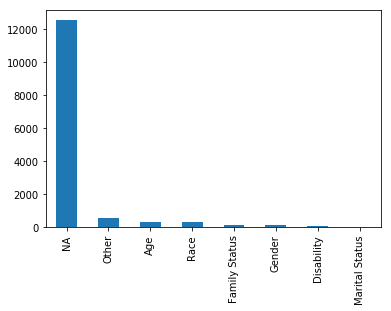

In [4]:
print(result.describe())

result['Type'].value_counts().plot(kind='bar')